Epoch 0: Loss = 0.319885
Epoch 10: Loss = 0.265776
Epoch 20: Loss = 0.254852
Epoch 30: Loss = 0.251496
Epoch 40: Loss = 0.249040
Epoch 50: Loss = 0.246526
Epoch 60: Loss = 0.244658
Epoch 70: Loss = 0.242846
Epoch 80: Loss = 0.241036
Epoch 90: Loss = 0.239205
Epoch 100: Loss = 0.237289
Epoch 110: Loss = 0.235267
Epoch 120: Loss = 0.233102
Epoch 130: Loss = 0.230769
Epoch 140: Loss = 0.228250
Epoch 150: Loss = 0.225549
Epoch 160: Loss = 0.222640
Epoch 170: Loss = 0.219543
Epoch 180: Loss = 0.216299
Epoch 190: Loss = 0.212963
Epoch 200: Loss = 0.209559
Epoch 210: Loss = 0.206137
Epoch 220: Loss = 0.202722
Epoch 230: Loss = 0.199339
Epoch 240: Loss = 0.196012
Epoch 250: Loss = 0.192748
Epoch 260: Loss = 0.189494
Epoch 270: Loss = 0.186242
Epoch 280: Loss = 0.183000
Epoch 290: Loss = 0.179722
Epoch 300: Loss = 0.176402
Epoch 310: Loss = 0.173017
Epoch 320: Loss = 0.169590
Epoch 330: Loss = 0.166120
Epoch 340: Loss = 0.162602
Epoch 350: Loss = 0.159030
Epoch 360: Loss = 0.155381
Epoch 370: L

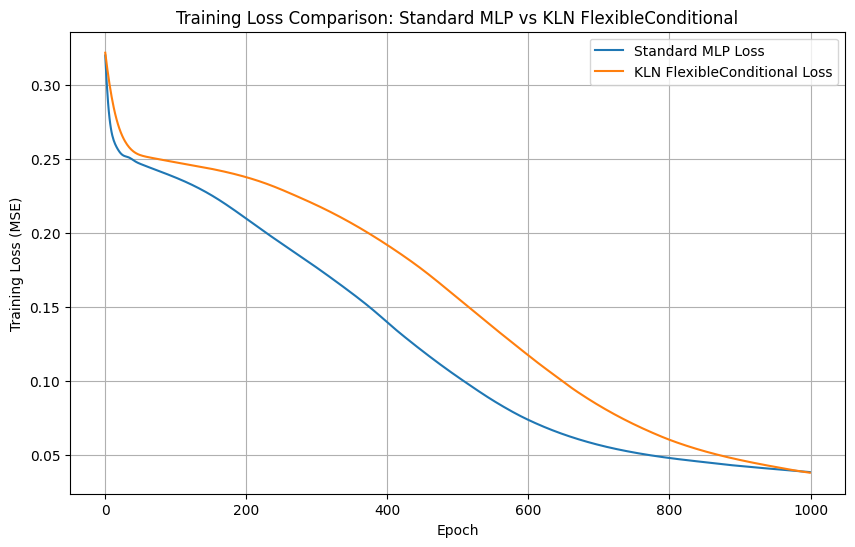

In [3]:
# KLN vs Standard MLP Benchmark Notebook (PyTorch)

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Import your KLN FlexibleConditional model
from kln import FlexibleConditional

# Standard MLP Model for Comparison
class StandardMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(StandardMLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.model(x)

# KLN-based Model
class KLNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(KLNModel, self).__init__()
        self.model = FlexibleConditional(input_dim, hidden_dim, output_dim)
        self.input_dim = input_dim

    def forward(self, x):
        # Split input x into i and j halves
        i = x[:, :self.input_dim//2]
        j = x[:, self.input_dim//2:]
        return self.model(i, j)

# Generate synthetic data
def generate_data(n_samples=10000):
    X = torch.randn(n_samples, 2)
    y = torch.sin(torch.pi * X[:, 0]) * torch.cos(torch.pi * X[:, 1])
    return X, y

# Train function
def train_model(model, X_train, y_train, epochs=1000, lr=1e-3):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(X_train).squeeze()
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Loss = {loss.item():.6f}")
    return losses

# Main Experiment
if __name__ == "__main__":
    # Set seed for reproducibility
    torch.manual_seed(42)

    X_train, y_train = generate_data()

    # Standard MLP
    standard_model = StandardMLP(input_dim=2, hidden_dim=64, output_dim=1)
    standard_losses = train_model(standard_model, X_train, y_train)

    # KLN Model
    kln_model = KLNModel(input_dim=2, hidden_dim=64, output_dim=1)
    kln_losses = train_model(kln_model, X_train, y_train)

    # Plot losses
    plt.figure(figsize=(10,6))
    plt.plot(standard_losses, label='Standard MLP Loss')
    plt.plot(kln_losses, label='KLN FlexibleConditional Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss (MSE)')
    plt.title('Training Loss Comparison: Standard MLP vs KLN FlexibleConditional')
    plt.legend()
    plt.grid(True)
    plt.show()

Epoch 0: Loss = 8.852458
Epoch 20: Loss = 3.952147
Epoch 40: Loss = 1.587075
Epoch 60: Loss = 0.675131
Epoch 80: Loss = 0.381613
Epoch 100: Loss = 0.285198
Epoch 120: Loss = 0.241587
Epoch 140: Loss = 0.217858
Epoch 160: Loss = 0.204769
Epoch 180: Loss = 0.197276
Epoch 200: Loss = 0.192436
Epoch 220: Loss = 0.188736
Epoch 240: Loss = 0.185475
Epoch 260: Loss = 0.182367
Epoch 280: Loss = 0.179310
Epoch 0: Loss = 5.401221
Epoch 20: Loss = 3.498829
Epoch 40: Loss = 2.121448
Epoch 60: Loss = 1.222698
Epoch 80: Loss = 0.694033
Epoch 100: Loss = 0.419816
Epoch 120: Loss = 0.296692
Epoch 140: Loss = 0.247748
Epoch 160: Loss = 0.228095
Epoch 180: Loss = 0.217896
Epoch 200: Loss = 0.210582
Epoch 220: Loss = 0.204494
Epoch 240: Loss = 0.199257
Epoch 260: Loss = 0.194732
Epoch 280: Loss = 0.190802


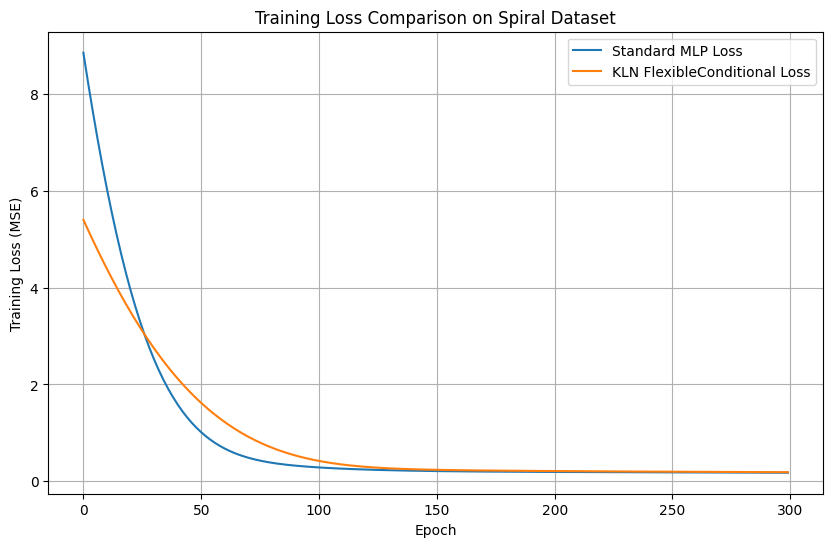

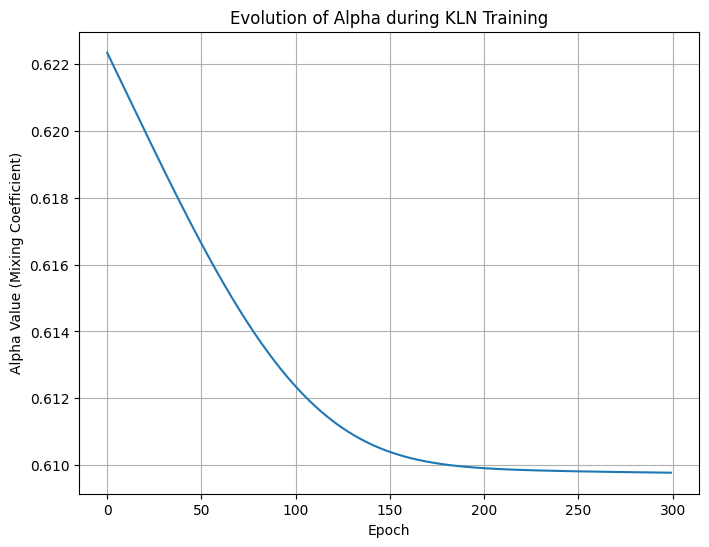

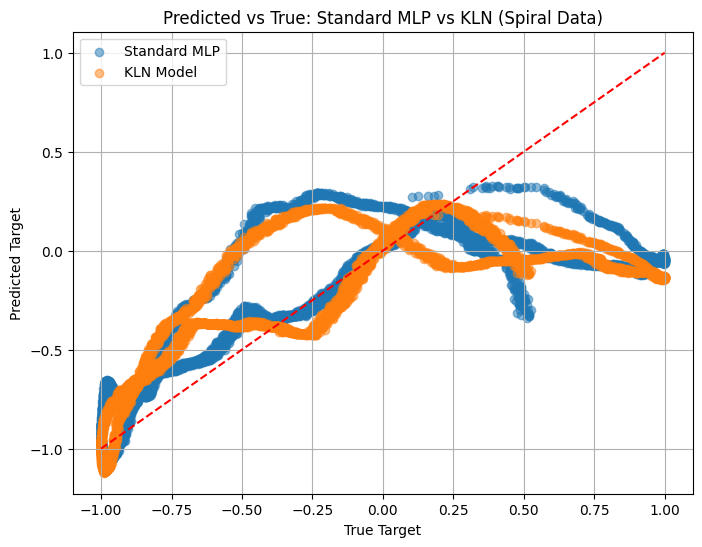

In [ ]:
# KLN vs Standard MLP Benchmark on Spiral Dataset

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from kln import FlexibleConditional

# --- Standard MLP Model ---
class StandardMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(StandardMLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.model(x)

# --- KLN Model ---
class KLNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(KLNModel, self).__init__()
        self.model = FlexibleConditional(input_dim, hidden_dim, output_dim)
        self.input_dim = input_dim

    def forward(self, x):
        i = x[:, :self.input_dim // 2]
        j = x[:, self.input_dim // 2:]
        return self.model(i, j)

# --- Spiral Data Generator ---
def generate_spiral_data(n_samples=5000, noise=0.1):
    n = np.sqrt(np.random.rand(n_samples)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_samples) * noise
    d1y = np.sin(n)*n + np.random.rand(n_samples) * noise
    X = np.vstack((d1x, d1y)).T
    y = np.sin(0.5 * np.sqrt(d1x**2 + d1y**2))  # Some nonlinear target based on distance
    return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# --- Train Model ---
def train_model(model, X_train, y_train, epochs=100, lr=5e-4, track_alpha=False):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    losses = []
    alphas = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(X_train).squeeze()
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

        if track_alpha:
            with torch.no_grad():
                alphas.append(torch.sigmoid(model.model.alpha).item())

        if epoch % 20 == 0:
            print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

    if track_alpha:
        return losses, alphas
    else:
        return losses

# --- Main Benchmark ---
if __name__ == "__main__":
    torch.manual_seed(42)

    X_train, y_train = generate_spiral_data()

    # Standard MLP
    standard_model = StandardMLP(input_dim=2, hidden_dim=64, output_dim=1)
    standard_losses = train_model(standard_model, X_train, y_train)

    # KLN Model
    kln_model = KLNModel(input_dim=2, hidden_dim=64, output_dim=1)
    kln_losses, kln_alphas = train_model(kln_model, X_train, y_train, track_alpha=True)

    # Plot Training Losses
    plt.figure(figsize=(10,6))
    plt.plot(standard_losses, label='Standard MLP Loss')
    plt.plot(kln_losses, label='KLN FlexibleConditional Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss (MSE)')
    plt.title('Training Loss Comparison on Spiral Dataset')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Alpha Evolution
    plt.figure(figsize=(8,6))
    plt.plot(kln_alphas)
    plt.xlabel('Epoch')
    plt.ylabel('Alpha Value (Mixing Coefficient)')
    plt.title('Evolution of Alpha during KLN Training')
    plt.grid(True)
    plt.show()

    # Final Evaluation Scatter Plot
    with torch.no_grad():
        pred_std = standard_model(X_train)
        pred_kln = kln_model(X_train)

    plt.figure(figsize=(8,6))
    plt.scatter(y_train.numpy(), pred_std.squeeze().numpy(), label='Standard MLP', alpha=0.5)
    plt.scatter(y_train.numpy(), pred_kln.squeeze().numpy(), label='KLN Model', alpha=0.5)
    plt.plot([-1,1], [-1,1], color='red', linestyle='--')
    plt.xlabel('True Target')
    plt.ylabel('Predicted Target')
    plt.title('Predicted vs True: Standard MLP vs KLN (Spiral Data)')
    plt.legend()
    plt.grid(True)
    plt.show()